In [1]:
import numpy as np
import laspy
import matplotlib.pyplot as plt

from scipy.spatial import Delaunay

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import chart_studio.plotly as py
import plotly.graph_objects as go

In [2]:
#inFile = output from TimeDiff_Segregation
inFile = laspy.file.File("/Users/xRai/NYU/CUSP/Dublin/NW-SE/nyu_2451_38647_laz_121253/0.00001_0.001.las", mode="r")

In [3]:
#sorting gpstime
gpstime = inFile.gps_time
gps_sort_ind = np.argsort(gpstime)
gpstime = gpstime[gps_sort_ind]

In [4]:
#sort inFile.points
FPoints = inFile.points
FPoints = FPoints[gps_sort_ind]

In [262]:
coord = np.vstack((inFile.X, inFile.Y, inFile.Z)).transpose()
coord = coord[gps_sort_ind]

In [461]:
db = DBSCAN(eps=500,min_samples=3).fit(coord)

In [462]:
#same length list with all zero
label = db.labels_
# Number of clusters in label, ignoring noise if present.
n_clusters_ = len(set(label)) - (1 if -1 in label else 0)
n_noise_ = list(label).count(-1)
print(n_clusters_)
print(n_noise_)

8940
25732


In [463]:
FPointst = FPoints[:]
i = np.argsort(label)
label, FPointst = label[i], FPointst[i]
FPointst
len(label)#110757
len(FPoints)


110757

In [464]:
coords = coord[:]
i = np.argsort(label)
label, coords = label[i], coords[i]

In [465]:
#group coord
coord_c = np.split(coords, np.flatnonzero(label[1:] != label[:-1])+1)
FPointst_c = np.split(FPointst, np.flatnonzero(label[1:] != label[:-1])+1)
len(FPointst_c)
label

array([  -1,   -1,   -1, ..., 8939, 8939, 8939])

In [466]:
#remove -1 (noises)
FPointst_c = FPointst_c[1:]
len(FPointst_c)

8940

In [467]:
#check length of each lst (should be >5)
for i in range(len(FPointst_c)):
    print(str(i)+" "+ str(len(FPointst_c[i])))

0 20
1 14
2 10
3 5
4 5
5 3
6 3
7 6
8 5
9 3
10 4
11 4
12 4
13 5
14 3
15 3
16 4
17 4
18 4
19 4
20 4
21 4
22 3
23 4
24 6
25 3
26 4
27 4
28 4
29 9
30 3
31 10
32 5
33 5
34 5
35 4
36 5
37 3
38 5
39 7
40 4
41 6
42 7
43 4
44 4
45 4
46 4
47 3
48 3
49 8
50 3
51 3
52 3
53 3
54 6
55 11
56 6
57 3
58 8
59 8
60 6
61 5
62 4
63 5
64 3
65 5
66 3
67 3
68 4
69 9
70 4
71 3
72 3
73 13
74 4
75 5
76 3
77 3
78 17
79 8
80 5
81 14
82 10
83 4
84 4
85 4
86 8
87 5
88 6
89 4
90 10
91 3
92 6
93 3
94 3
95 5
96 3
97 5
98 6
99 5
100 12
101 3
102 5
103 4
104 14
105 14
106 3
107 5
108 5
109 5
110 5
111 188
112 32
113 7
114 5
115 29
116 54
117 5
118 10
119 23
120 4
121 5
122 17
123 4
124 5
125 18
126 4
127 4
128 20
129 3
130 8
131 12
132 3
133 4
134 3
135 10
136 6
137 5
138 3
139 3
140 3
141 3
142 7
143 8
144 3
145 10
146 3
147 3
148 6
149 6
150 3
151 3
152 5
153 4
154 3
155 8
156 3
157 4
158 3
159 3
160 3
161 3
162 3
163 7
164 5
165 3
166 6
167 4
168 4
169 3
170 3
171 3
172 3
173 4
174 20
175 14
176 5
177 3
178 62
179 6
1

2079 3
2080 3
2081 8
2082 3
2083 10
2084 9
2085 3
2086 3
2087 3
2088 5
2089 5
2090 3
2091 3
2092 4
2093 3
2094 5
2095 3
2096 3
2097 5
2098 53
2099 8
2100 3
2101 4
2102 3
2103 3
2104 3
2105 31
2106 6
2107 3
2108 3
2109 6
2110 3
2111 7
2112 3
2113 3
2114 3
2115 5
2116 4
2117 4
2118 5
2119 3
2120 4
2121 4
2122 3
2123 6
2124 4
2125 7
2126 3
2127 6
2128 4
2129 4
2130 4
2131 7
2132 3
2133 3
2134 9
2135 7
2136 7
2137 6
2138 4
2139 3
2140 8
2141 3
2142 4
2143 3
2144 6
2145 4
2146 5
2147 5
2148 3
2149 3
2150 3
2151 11
2152 5
2153 5
2154 6
2155 3
2156 5
2157 6
2158 3
2159 6
2160 5
2161 3
2162 3
2163 7
2164 6
2165 3
2166 3
2167 11
2168 6
2169 5
2170 4
2171 3
2172 10
2173 4
2174 14
2175 3
2176 3
2177 3
2178 3
2179 5
2180 7
2181 6
2182 6
2183 3
2184 5
2185 5
2186 4
2187 3
2188 4
2189 5
2190 14
2191 7
2192 3
2193 6
2194 6
2195 3
2196 3
2197 3
2198 10
2199 3
2200 9
2201 7
2202 11
2203 3
2204 3
2205 5
2206 8
2207 3
2208 3
2209 5
2210 4
2211 3
2212 7
2213 7
2214 5
2215 5
2216 10
2217 9
2218 4
2219 4
22

3578 3
3579 3
3580 8
3581 8
3582 11
3583 11
3584 5
3585 12
3586 26
3587 18
3588 6
3589 6
3590 4
3591 4
3592 18
3593 17
3594 3
3595 92
3596 4
3597 36
3598 3
3599 3
3600 8
3601 9
3602 22
3603 14
3604 9
3605 3
3606 3
3607 3
3608 5
3609 7
3610 4
3611 6
3612 5
3613 5
3614 24
3615 25
3616 4
3617 12
3618 22
3619 6
3620 3
3621 8
3622 3
3623 3
3624 13
3625 10
3626 9
3627 10
3628 7
3629 12
3630 6
3631 5
3632 10
3633 3
3634 10
3635 4
3636 8
3637 8
3638 3
3639 11
3640 5
3641 9
3642 15
3643 3
3644 11
3645 39
3646 9
3647 3
3648 6
3649 3
3650 3
3651 16
3652 17
3653 10
3654 15
3655 6
3656 3
3657 3
3658 16
3659 9
3660 6
3661 3
3662 6
3663 3
3664 3
3665 9
3666 3
3667 3
3668 3
3669 3
3670 5
3671 3
3672 5
3673 9
3674 10
3675 9
3676 7
3677 5
3678 7
3679 7
3680 8
3681 3
3682 4
3683 3
3684 4
3685 3
3686 3
3687 5
3688 5
3689 3
3690 16
3691 15
3692 6
3693 6
3694 4
3695 3
3696 4
3697 3
3698 3
3699 3
3700 4
3701 6
3702 10
3703 5
3704 5
3705 4
3706 4
3707 10
3708 4
3709 3
3710 6
3711 4
3712 50
3713 17
3714 16
371

5578 7
5579 3
5580 6
5581 3
5582 5
5583 3
5584 3
5585 6
5586 3
5587 4
5588 3
5589 4
5590 7
5591 4
5592 4
5593 13
5594 4
5595 7
5596 3
5597 5
5598 6
5599 5
5600 8
5601 5
5602 8
5603 3
5604 5
5605 5
5606 39
5607 3
5608 7
5609 6
5610 5
5611 10
5612 12
5613 3
5614 6
5615 24
5616 4
5617 10
5618 3
5619 8
5620 4
5621 5
5622 21
5623 7
5624 4
5625 5
5626 3
5627 4
5628 16
5629 3
5630 6
5631 60
5632 4
5633 3
5634 4
5635 3
5636 19
5637 11
5638 4
5639 8
5640 3
5641 8
5642 3
5643 4
5644 3
5645 6
5646 14
5647 8
5648 22
5649 6
5650 8
5651 5
5652 5
5653 12
5654 5
5655 18
5656 5
5657 9
5658 11
5659 3
5660 5
5661 9
5662 4
5663 7
5664 5
5665 5
5666 3
5667 14
5668 6
5669 3
5670 3
5671 8
5672 4
5673 5
5674 11
5675 15
5676 4
5677 5
5678 5
5679 5
5680 3
5681 3
5682 4
5683 5
5684 16
5685 3
5686 11
5687 3
5688 3
5689 3
5690 3
5691 3
5692 10
5693 8
5694 5
5695 3
5696 3
5697 6
5698 4
5699 5
5700 3
5701 7
5702 10
5703 9
5704 10
5705 10
5706 52
5707 7
5708 14
5709 4
5710 3
5711 32
5712 5
5713 5
5714 9
5715 3
5716 1

7577 7
7578 3
7579 3
7580 4
7581 4
7582 4
7583 5
7584 10
7585 11
7586 3
7587 4
7588 3
7589 3
7590 4
7591 23
7592 15
7593 4
7594 8
7595 20
7596 10
7597 8
7598 55
7599 3
7600 3
7601 4
7602 4
7603 3
7604 8
7605 6
7606 11
7607 6
7608 7
7609 4
7610 8
7611 15
7612 3
7613 8
7614 5
7615 9
7616 5
7617 3
7618 110
7619 5
7620 4
7621 4
7622 10
7623 5
7624 4
7625 3
7626 3
7627 5
7628 3
7629 3
7630 7
7631 4
7632 40
7633 10
7634 8
7635 4
7636 7
7637 3
7638 8
7639 7
7640 6
7641 3
7642 4
7643 4
7644 3
7645 3
7646 16
7647 40
7648 5
7649 6
7650 4
7651 3
7652 6
7653 6
7654 10
7655 32
7656 4
7657 3
7658 58
7659 13
7660 3
7661 9
7662 5
7663 6
7664 7
7665 3
7666 4
7667 27
7668 71
7669 3
7670 6
7671 7
7672 5
7673 11
7674 15
7675 20
7676 4
7677 4
7678 6
7679 12
7680 4
7681 10
7682 3
7683 3
7684 5
7685 19
7686 10
7687 4
7688 635
7689 4
7690 4
7691 8
7692 4
7693 3
7694 5
7695 17
7696 3
7697 20
7698 16
7699 4
7700 12
7701 6
7702 5
7703 10
7704 3
7705 37
7706 4
7707 3
7708 3
7709 25
7710 6
7711 4
7712 15
7713 7
77

In [468]:
coord_c = coord_c[1:]
len(coord_c)

8940

In [469]:
coordt=np.array([])

for lst in coord_c:
    if (len(lst)<60):
        #remove
        coordt = np.append(coordt,None)
        coordt[-1] = lst
    else:
        #recluster
        db = DBSCAN(eps=500,min_samples=3).fit(lst)
        label = db.labels_
        lst_c = lst[:]
        i = np.argsort(label)
        label, lst_c = label[i], lst_c[i]
        lst_tc = np.split(lst_c, np.flatnonzero(label[1:] != label[:-1])+1)
        lst_tc = lst_tc[1:]
        #reclustered, append to list
        for i in range(len(lst_tc)):
            coordt = np.append(coordt,None)
            coordt[-1] = lst_tc[i]
            
len(coordt)

10963

In [472]:
#Fpoints version
#FPointst_c = coord_c
#cooordt = FP2
FP2=np.array([])

for i in range(len(FPointst_c)):
    if (len(FPointst_c[i])<60):
        #remove
        FP2 = np.append(FP2,None)
        FP2[-1] = FPointst_c[i]
    else:
        #recluster
        db = DBSCAN(eps=500,min_samples=3).fit(coord_c[i])
        label = db.labels_
        lst_c = FPointst_c[i][:]
        i = np.argsort(label)
        label, lst_c = label[i], lst_c[i]
        lst_tc = np.split(lst_c, np.flatnonzero(label[1:] != label[:-1])+1)
        lst_tc = lst_tc[1:]
        #reclustered, append to list
        for i in range(len(lst_tc)):
            FP2 = np.append(FP2,None)
            FP2[-1] = lst_tc[i]
            
len(FP2)

10963

In [483]:
#std, get z axis
#for 1 cluster
z0_data = FP2[0]
z0_lst = [val for sublist in z0_data for val in sublist]
z0 = [row[2] for row in z0_lst]
np.std(z0)

28.415268782821677

In [488]:
##calculate z sigma for all
z_std = np.array([])
z_std2 = np.array([])
for i in range(len(FP2)):
    z_data = FP2[i]
    z_lst = [val for sublist in z_data for val in sublist]
    z_val = [row[2] for row in z_lst]
    z_std = np.append(z_std,np.std(z_val))
    
len(z_std)


10963

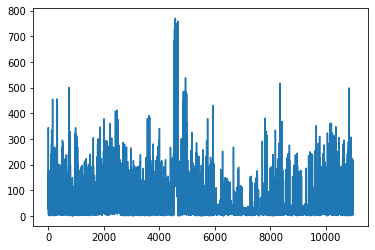

In [489]:
plt.plot(z_std)

In [613]:
#if z_std > 300
#find index
#remove from FP2
z_std_masked = np.where(z_std<300,0,1)
z_std_masked_c = np.count_nonzero(z_std_masked == 1)
z_std_masked_c

224

In [631]:
#keep all clusteres less then the acceptable standard deviation
outputlst = np.transpose((z_std<40).nonzero()).flatten()

array([    0,     4,     9, ..., 10957, 10959, 10962])

In [632]:
outer  = np.array([])
for i in outputlst:
    outer = np.append(outer,None)
    outer[-1] = FP2[i]
    
outPoint = np.concatenate(outer).ravel()

In [633]:
outFile = laspy.file.File("/Users/xRai/NYU/CUSP/Dublin/NW-SE/nyu_2451_38647_laz_121253/coor500.3_FP2_std40.las", mode = "w",
                header = inFile.header)
outFile.points = outPoint
outFile.close()